In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint



In [75]:
os.getcwd()

'C:\\Users\\IRON MAN\\Cotton Plant'

In [123]:
cd/Users/IRON MAN/Cotton Plant/Train

C:\Users\IRON MAN\Cotton Plant\Train


In [77]:
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [124]:
# loading dataset
data = []
labels = []
classes = 4
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(1951, 30, 30, 3) (1951,)


In [125]:
cd/Users/IRON MAN/Cotton Plant/Test

C:\Users\IRON MAN\Cotton Plant\Test


In [126]:
# loading dataset
test_data = []
test_labels = []
classes = 4
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(i)
        
test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape,test_labels.shape)

(36, 30, 30, 3) (36,)


In [130]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1560, 30, 30, 3) (391, 30, 30, 3) (1560,) (391,)


In [78]:
cd/Users/IRON MAN/Cotton Plant/Test

C:\Users\IRON MAN\Cotton Plant\Test


In [79]:
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant',
 'test data comp files']

In [80]:
cd/Users/IRON MAN/Cotton Plant/val

C:\Users\IRON MAN\Cotton Plant\val


In [81]:
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [82]:
cd/Users/IRON MAN/Cotton Plant/Train

C:\Users\IRON MAN\Cotton Plant\Train


In [83]:
training_data_path = os.getcwd()

In [84]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(training_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [85]:
# As you can see
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [86]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [87]:
cd/Users/IRON MAN/Cotton Plant/val

C:\Users\IRON MAN\Cotton Plant\val


In [88]:
validation_data_path = os.getcwd()

In [110]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


In [90]:
valid_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [91]:
cd/Users/IRON MAN/Cotton Plant/Train

C:\Users\IRON MAN\Cotton Plant\Train


In [92]:
curr_path_train = os.getcwd()

Text(0, 0.5, 'Number of Traingn images')

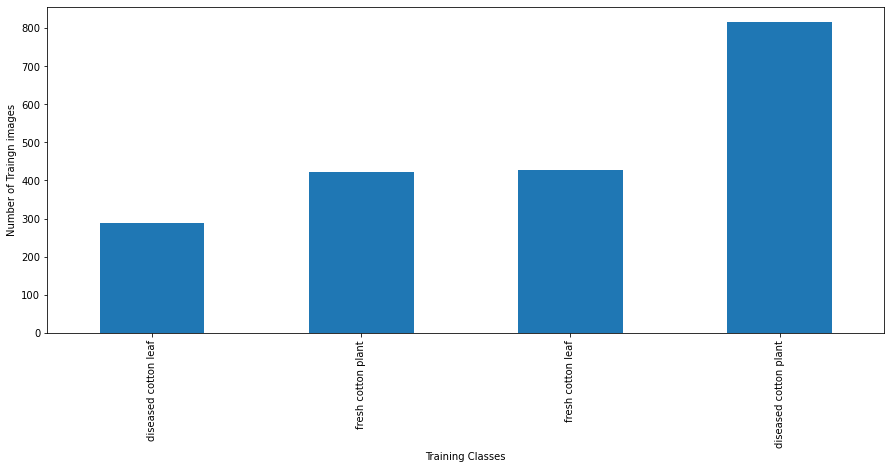

In [93]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path_train):
    data_dic[folder] = len(os.listdir(curr_path_train + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [94]:
cd/Users/IRON MAN/Cotton Plant/val

C:\Users\IRON MAN\Cotton Plant\val


In [95]:
cur_val_path = os.getcwd()

Text(0, 0.5, 'Number of Valedation images')

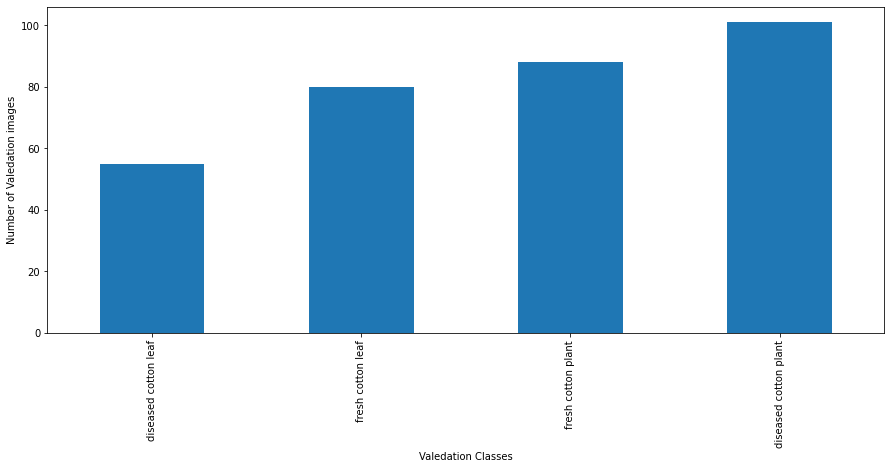

In [96]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(cur_val_path):
    data_dic[folder] = len(os.listdir(cur_val_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Valedation Classes')
plt.ylabel('Number of Valedation images')

In [97]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

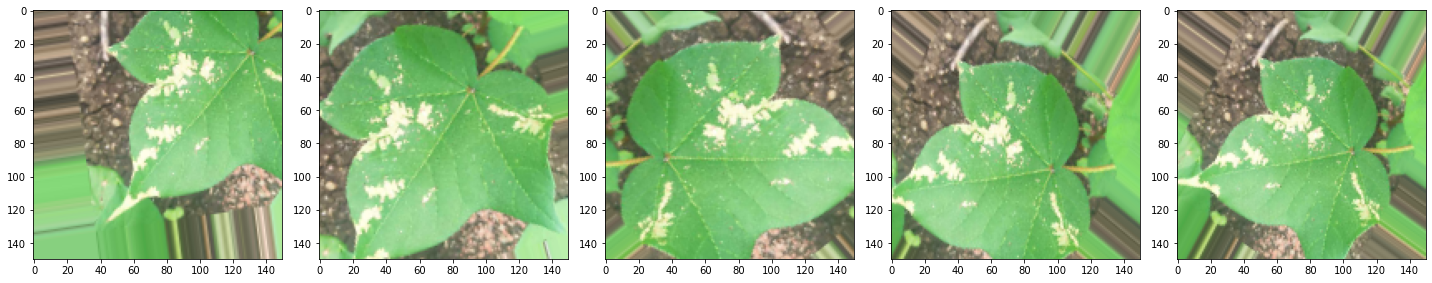

In [98]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


In [99]:
cd/Users/IRON MAN/Cotton Plant

C:\Users\IRON MAN\Cotton Plant


In [100]:
# save best model using vall accuracy
model_path = 'Cotton Plant Disease.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [101]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4, activation='softmax'))

In [102]:

# compile cnn model
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 142, 142, 32)      25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 69, 69, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 67, 67, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 33, 33, 64)       

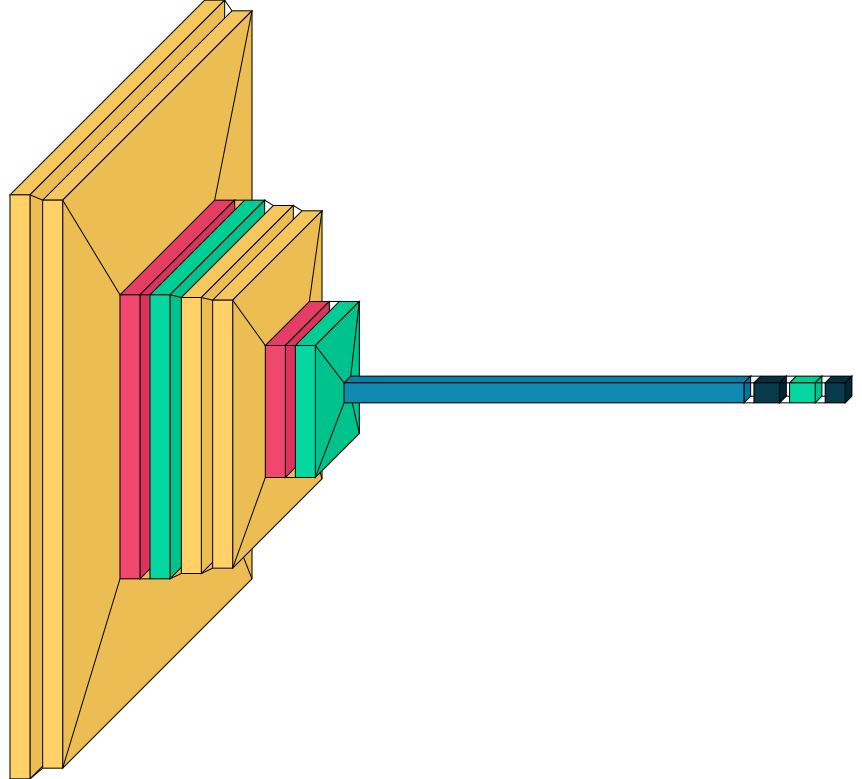

In [104]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

In [106]:
# train cnn model
history = model.fit(training_data,epochs=20, batch_size = 128, verbose=1, validation_data= valid_data) 

Epoch 1/20
61/61 [==============================] - 358s 6s/step - loss: 1.3152 - accuracy: 0.4177 - val_loss: 1.3786 - val_accuracy: 0.3117

Epoch 00001: val_accuracy did not improve from 0.31173
Epoch 2/20
61/61 [==============================] - 311s 5s/step - loss: 1.3124 - accuracy: 0.4177 - val_loss: 1.3867 - val_accuracy: 0.3117

Epoch 00002: val_accuracy did not improve from 0.31173
Epoch 3/20
61/61 [==============================] - 314s 5s/step - loss: 1.3143 - accuracy: 0.4177 - val_loss: 1.3951 - val_accuracy: 0.3117

Epoch 00003: val_accuracy did not improve from 0.31173
Epoch 4/20
61/61 [==============================] - 403s 7s/step - loss: 1.3144 - accuracy: 0.4177 - val_loss: 1.3951 - val_accuracy: 0.3117

Epoch 00004: val_accuracy did not improve from 0.31173
Epoch 5/20
61/61 [==============================] - 422s 7s/step - loss: 1.3175 - accuracy: 0.4177 - val_loss: 1.3767 - val_accuracy: 0.3117

Epoch 00005: val_accuracy did not improve from 0.31173
Epoch 6/20
61/6

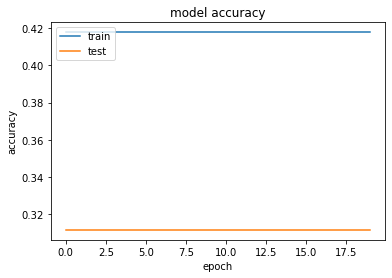

In [107]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


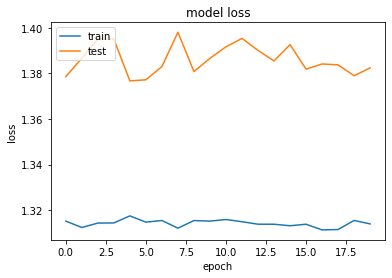

{'loss': [1.3152130842208862,
  1.3124173879623413,
  1.3143469095230103,
  1.31441068649292,
  1.3175055980682373,
  1.3147573471069336,
  1.31548011302948,
  1.312114953994751,
  1.315455436706543,
  1.31521737575531,
  1.3159070014953613,
  1.3149422407150269,
  1.3138518333435059,
  1.3138360977172852,
  1.3131742477416992,
  1.3138415813446045,
  1.311347246170044,
  1.3115264177322388,
  1.3155113458633423,
  1.313977599143982],
 'accuracy': [0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327,
  0.4177345037460327],
 'val_loss': [1.3786085844039917,
  1.386689305305481,
  1.3951458930969238,
  1.3950903415679932,
  1.37673

In [108]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history